<a href="https://colab.research.google.com/github/akshat0522/Myntra-Online-Retail-Customer-Segmentation/blob/main/Myntra_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Myntra Online Retail Customer Segmentation

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

Myntra is a leading Indian fashion e-commerce company known for its wide range of clothing, accessories, and lifestyle products. While Myntra is recognized primarily for fashion, this dataset relates to the company's online retail operations for Myntra Gifts Ltd., a UK-based division specializing in unique all-occasion giftware. This dataset spans transactions from December 1, 2009, to December 9, 2011, and includes detailed records of sales made through Myntra Gifts Ltd.’s non-store online platform. The dataset provides a thorough snapshot of the company's international online retail activities during this period.

# **GitHub Link -**

https://github.com/akshat0522/Myntra-Online-Retail-Customer-Segmentation

# **Problem Statement**


The primary purpose of analyzing this dataset is to extract valuable insights to enhance Myntra Gifts Ltd.'s business strategies.

Specific goals include:

**1. Identifying Purchasing Trends:**

Understanding patterns in customer purchases over time, including seasonal trends and product preferences, to better align inventory and marketing strategies.

**2. Evaluating Product Performance:**

Assessing which products are most and least popular to optimize product offerings and make informed decisions about stock management and new product introductions.

**3. Understanding Customer Behavior:**

Analyzing customer buying habits, frequency of purchases, and geographic distribution to tailor marketing efforts and improve customer segmentation.

**4. Optimizing Pricing Strategies:**

Evaluating the relationship between unit prices and sales volume to refine pricing models and maximize revenue while ensuring competitive pricing.

**5. Streamlining Inventory Management:**

Using sales and demand data to enhance inventory planning, reduce instances of overstock and stockouts, and improve overall inventory efficiency.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [76]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Dataset Loading

In [77]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
# Load Dataset
data_path = "/content/drive/MyDrive/Colab Notebooks/Module 4 : Machine Learning/Capstone Project Unsupervised ML/Online Retail.csv"
Myntra_Data = pd.read_csv(data_path)

### Dataset First View

In [79]:
# Dataset First Look
Myntra_Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [80]:
# Dataset Rows & Columns count
Myntra_Data.shape

(541909, 8)

### Dataset Information

In [81]:
# Dataset Info
Myntra_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [82]:
# Dataset Duplicate Value Count
Myntra_Data.duplicated().sum()

5268

#### Missing Values/Null Values

In [83]:
# Missing Values/Null Values Count
Myntra_Data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


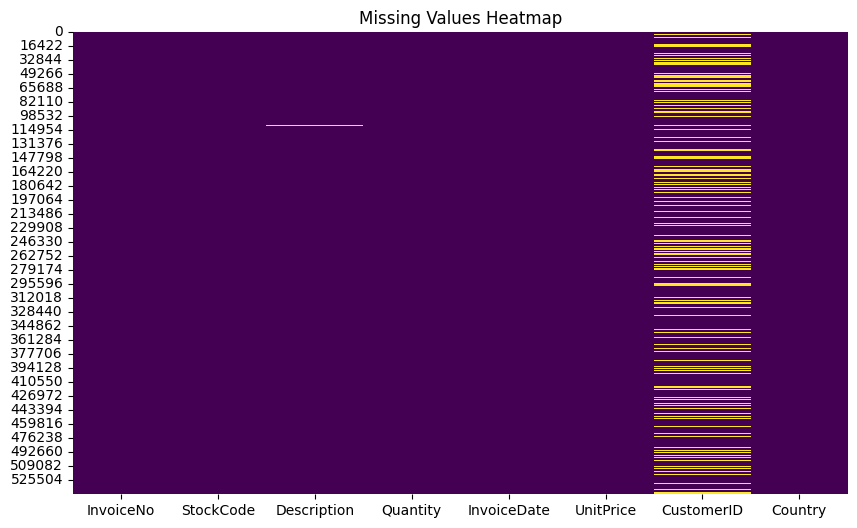

In [84]:
# Visualizing the missing values

plt.figure(figsize=(10, 6))
sns.heatmap(Myntra_Data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

- Data shape is (541909,8) means it has 541909 rows and 8 columns.
- Data has 5268 duplicated values.
- Also there are missing values in the data.
  - **Description** column has **1454** missing values.
  - **Customer ID** column is having **135080** missing values.

## ***2. Understanding Your Variables***

In [85]:
# Dataset Columns
Myntra_Data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [86]:
# Dataset Describe
Myntra_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


### Variables Description

- **InvoiceNo :** This variable represents the invoice or transaction number assigned to each purchase.

- **StockCode :** The StockCode variable corresponds to a code or identifier assigned to each distinct product in the inventory.

- **Description :** The Description variable provides a brief description of the product purchased in each transaction.

- **Quantity :** This represents the quantity of the product bought by the customer.

- **InvoiceDate :** The InvoiceDate variable indicates the date and time when each transaction took place.

- **UnitPrice :** This variable represents the price of each unit of the product.

- **CustomerID :** The CustomerID variable serves as a unique identifier assigned to each customer.

- **Country :** The Country variable represents the location where customer resides or where the transaction took place.

### Check Unique Values for each variable.

In [87]:
# Check Unique Values for each variable.
for i in Myntra_Data.columns:
  print(f"No. of unique values in {i} : {Myntra_Data[i].nunique()}")

No. of unique values in InvoiceNo : 25900
No. of unique values in StockCode : 4070
No. of unique values in Description : 4223
No. of unique values in Quantity : 722
No. of unique values in InvoiceDate : 23260
No. of unique values in UnitPrice : 1630
No. of unique values in CustomerID : 4372
No. of unique values in Country : 38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [88]:
# Create a copy of original dataframe
Myntra_df = Myntra_Data.copy()

In [89]:
# Drop rows where 'CustomerID' is missing
Myntra_df.dropna(subset=['CustomerID'], inplace=True)

In [90]:
Myntra_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [91]:
# Removing Duplicates
Myntra_df = Myntra_df.drop_duplicates()

In [92]:
Myntra_df.duplicated().sum()

0

In [93]:
Myntra_df.shape

(401604, 8)

In [94]:
# Remove rows with negative or zero Quantity and UnitPrice
Myntra_df = Myntra_df[(Myntra_df['Quantity'] > 0) & (Myntra_df['UnitPrice'] > 0)]

# Remove the cancelled orders and only consider the actual orders in the dataset
Myntra_df = Myntra_df[~Myntra_df['InvoiceNo'].astype(str).str.startswith('C')]

In [95]:
# Convert 'InvoiceDate' to datetime format
Myntra_df['InvoiceDate'] = pd.to_datetime(Myntra_df['InvoiceDate'], format = "%m/%d/%y %H:%M")

In [96]:
# Convert 'CustomerID' to integer
Myntra_df['CustomerID'] = Myntra_df['CustomerID'].astype(int)

In [97]:
# Extract Date Features
Myntra_df['Day'] = Myntra_df['InvoiceDate'].dt.day_name()       # Weekday name
Myntra_df['Year'] = Myntra_df['InvoiceDate'].dt.year            # Year
Myntra_df['Month_num'] = Myntra_df['InvoiceDate'].dt.month      # Numeric month
Myntra_df['Day_num'] = Myntra_df['InvoiceDate'].dt.day          # Day of the month
Myntra_df['Hour'] = Myntra_df['InvoiceDate'].dt.hour            # Hour
Myntra_df['Minute'] = Myntra_df['InvoiceDate'].dt.minute        # Minute
Myntra_df['Month'] = Myntra_df['InvoiceDate'].dt.month_name()   # Full month name

In [98]:
# Create a 'Purchase_Amount' Column
Myntra_df['Purchase_Amount'] = Myntra_df['Quantity'] * Myntra_df['UnitPrice']

### What all manipulations have you done and insights you found?

1. **Handled Missing Values:**  
   - Dropped rows where `CustomerID` is missing.

2. **Removed Invalid Transactions:**  
   - Removed rows where **`Quantity` or `UnitPrice` ≤ 0** (invalid transactions).  
   - Filtered out **cancelled orders** (i.e., `InvoiceNo` starting with `"C"`).  

3. **Converted Data Types:**  
   - Converted `InvoiceDate` to **datetime** format for time-based analysis.  
   - Converted `CustomerID` to **integer** for consistency.  

4. **Removed Duplicates:**  
   - Dropped duplicate records to avoid redundancy in analysis.  

5. **Created New Features:**  
   - Extracted **Year, Month, Day, Weekday, and Hour** from `InvoiceDate` for time-based insights.  
   - Created a **`Purchase_Amount` column** (`Quantity * UnitPrice`) to measure sales performance.  


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1 : Top 10 Most sold products**

In [99]:
# Most sold product on the basis of count of each product description
Myntra_df['Description'].value_counts().head(10)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2016
REGENCY CAKESTAND 3 TIER,1713
JUMBO BAG RED RETROSPOT,1615
ASSORTED COLOUR BIRD ORNAMENT,1395
PARTY BUNTING,1389
LUNCH BAG RED RETROSPOT,1303
SET OF 3 CAKE TINS PANTRY DESIGN,1152
POSTAGE,1099
LUNCH BAG BLACK SKULL.,1078


Text(0.5, 0, 'Product Description')

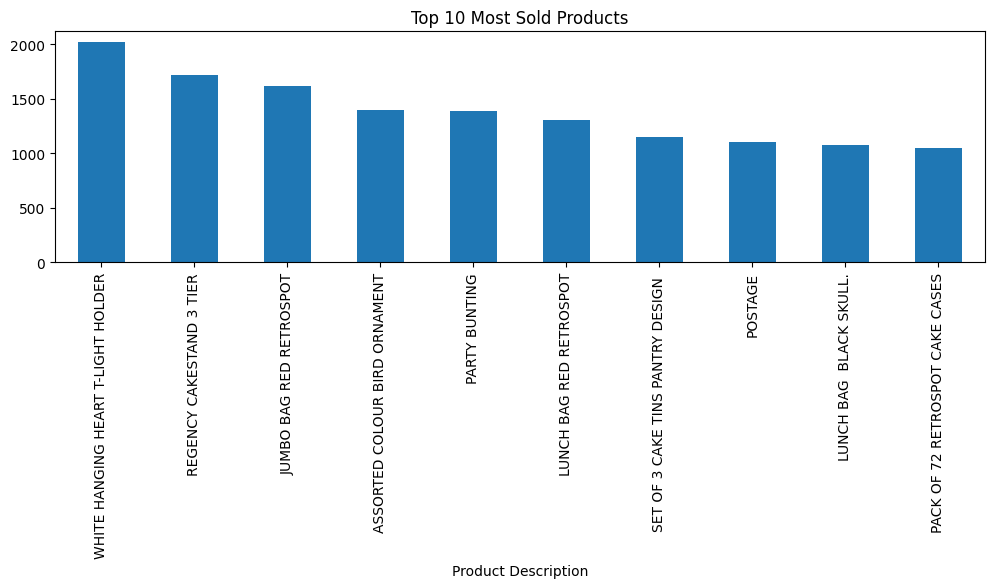

In [100]:
# Bar plot of top 10 most sold products
plt.figure(figsize=(12, 3))
Myntra_df['Description'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product Description')

##### 1. Why did you pick the specific chart?

I used bar chart to see which product comes under top 10 category according to count, means which are the top 10 most sold products.

##### 2. What is/are the insight(s) found from the chart?

I got to know that :
- `WHITE HANGING HEART T-LIGHT HOLDER` is the most sold product having the count of `2016`

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights can be highly valuable for improving business strategies.

- Company should keep `WHITE HANGING HEART T-LIGHT HOLDER` well-stocked and consider bundling & promotions.

#### **Chart - 2 : Top 10 Best Selling products (Products generated highest revenue)**

Text(0.5, 1.0, 'Top 10 Best Selling Products')

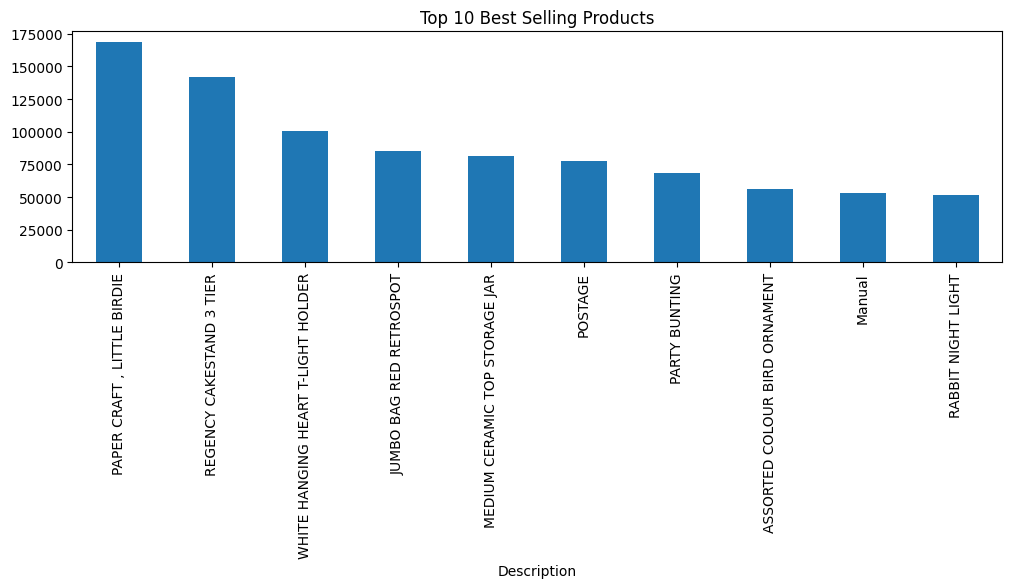

In [101]:
# Barplot of best selling products
plt.figure(figsize=(12, 3))
Myntra_df.groupby('Description')['Purchase_Amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Best Selling Products')

##### 1. Why did you pick the specific chart?

I used bar chart to see which product comes under top 10 category according to revenue generation.

##### 2. What is/are the insight(s) found from the chart?

 With the help of the above visualiation we can say that :
 - `PAPER CRAFT , LITTLE BIRDIE` is highest in generating revenue having the total purchase amount of `168469.60`

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights can be highly valuable for improving business strategies.

- Company should ensure consistent supply & pricing for `PAPER CRAFT, LITTLE BIRDIE` to maximize revenue.

#### **Chart - 3 : Sales Trends Over Months**

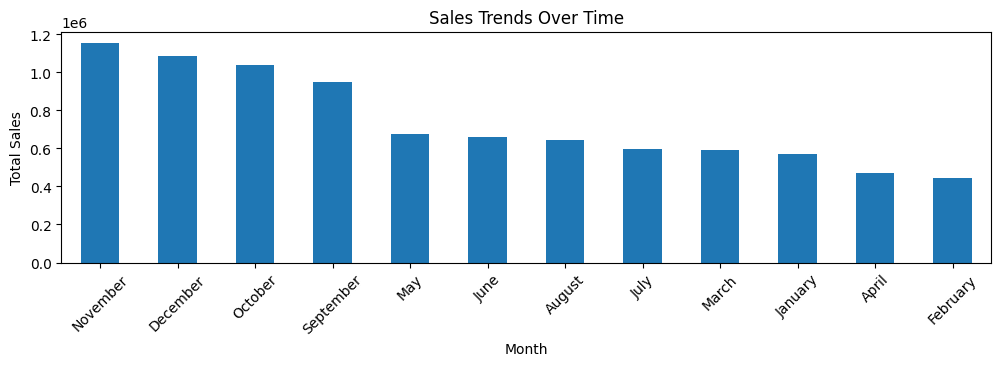

In [102]:
# Chart - 2 : Sales Trends Over Time
plt.figure(figsize = (12, 3))
Myntra_df.groupby('Month')['Purchase_Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To check for the month in which we get high sales.

##### 2. What is/are the insight(s) found from the chart?

I found that in the months of `November`, `December` and `October`, company got the highest sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is a good actionable insight which can help company.
- Company can plan better using this info to maximise sales during these month by using dynamic pricing or giving some offers.

#### **Chart - 4 : Customer Segmentation Based on Purchase Frequency**

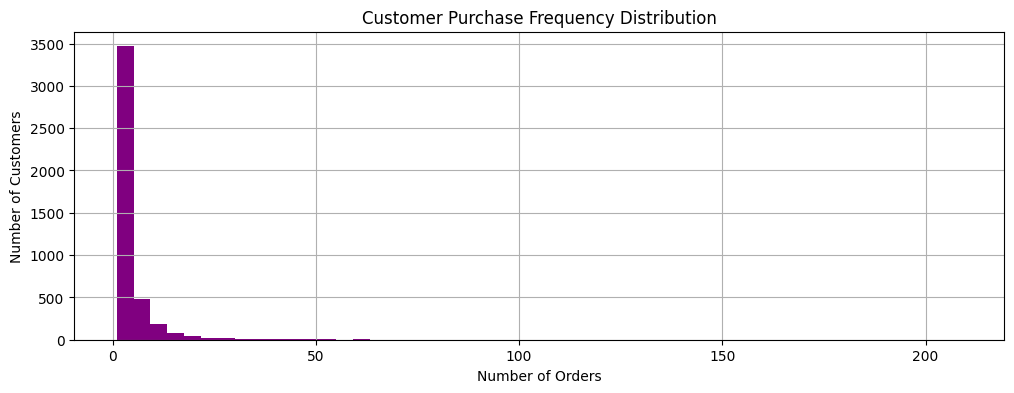

In [155]:
# Chart - 4 : Customer Segmentation Based on Purchase Frequency
customer_order_counts = Myntra_df.groupby('CustomerID')['InvoiceNo'].nunique()

# Sorting in descending order
customer_order_counts = customer_order_counts.sort_values(ascending = False)

# Plot the histogram
plt.figure(figsize=(12,4))
customer_order_counts.hist(bins=50, color='purple')
plt.title("Customer Purchase Frequency Distribution")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()


##### 1. Why did you pick the specific chart?

To check for the purchase frequency of the customers.

##### 2. What is/are the insight(s) found from the chart?

- The distribution is `highly skewed to the right.`
- This suggests that `most customers are one-time or occasional buyers` who have placed only a few orders (mostly between 1-10)., while very few customers with a high number of orders (above 50).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see that :
1. The majority of customers purchase only once or a few times.
2. There’s a small group of loyal customers who make multiple purchases.

The company could implement loyalty programs or personalized offers to encourage repeat purchases from one-time buyers.

#### Chart - 5

In [104]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [105]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [106]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [107]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [108]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [109]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [110]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [111]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [112]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [113]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [114]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [115]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [116]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [117]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [118]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [119]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [120]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [121]:
# Expand Contraction

#### 2. Lower Casing

In [122]:
# Lower Casing

#### 3. Removing Punctuations

In [123]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [124]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [125]:
# Remove Stopwords

In [126]:
# Remove White spaces

#### 6. Rephrase Text

In [127]:
# Rephrase Text

#### 7. Tokenization

In [128]:
# Tokenization

#### 8. Text Normalization

In [129]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [130]:
# POS Taging

#### 10. Text Vectorization

In [131]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [132]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [133]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [134]:
# Transform Your data

### 6. Data Scaling

In [135]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [136]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [137]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [138]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [139]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [140]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [141]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [142]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [143]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [144]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [145]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [146]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [147]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [148]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***